**Data**

In [1]:
library(tidyverse) # metapackage of all tidyverse packages

data <- read_csv("../input/csv-file/concrete_data.csv", show_col_types = FALSE)

# "cement" -- X1
# "blast_furnace_slag" -- X2
# "fly_ash" -- X3
# "water" -- X4
# "superplasticizer" -- X5
# "coarse_aggregate" -- X6
# "fine_aggregate" -- X7
# "age" -- X8
# "concrete_compressive_strength" -- Y

# data <- read.csv("/kaggle/input/csv-file")
colnames(data) <- c("X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "Y")
data <- as.data.frame(data)

#view data
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,X1,X2,X3,X4,X5,X6,X7,X8,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
4,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
6,266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


# Model Selection

Full Model

In [2]:
# full model
full_model <- lm(Y ~ X1+X2+X3+X4+X5+X8, data = data)

In [ ]:
plot(full_model_t)

In [ ]:

data$new.X1 <- log10(data$X1)
data$new.X5 <- sqrt(data$X5)
data$new.X8 <- log10(data$X8)

full_model_t_xy <- lm(new.Y ~ new.X1+X2+X3+X4+new.X5+new.X8, data = data)

# 80-20 split

In [2]:
sample_index <- sample(seq_len(nrow(data)), size = 0.8 * nrow(data))

train_set <- data[sample_index, ]
test_set  <- data[-sample_index, ]

print(nrow(train_set))
print(nrow(test_set))

[1] 824
[1] 206


In [6]:
trimmed_data <- data[, !(colnames(train_set) %in% c("X6", "X7"))]
head(trimmed_data)

,X1,X2,X3,X4,X5,X8,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,28,79.99
2,540.0,0.0,0,162,2.5,28,61.89
3,332.5,142.5,0,228,0.0,270,40.27
4,332.5,142.5,0,228,0.0,365,41.05
5,198.6,132.4,0,192,0.0,360,44.30
6,266.0,114.0,0,228,0.0,90,47.03


In [5]:
# Load necessary libraries
library(MASS)

#Stepwise Regression (Using AIC)
null_model <- lm(Y ~ 1, data = trimmed_data)
full_model <- lm(Y ~ ., data = trimmed_data)

#regfit_forward <- step(null_model, scope = formula(full_model), direction = "forward")
## output -- new.Y ~ X1 + X5 + X8 + X2 + X3 + X4

#regfit_backward <- step(full_model, direction = "backward")
## output -- new.Y ~ X1 + X2 + X3 + X4 + X5 + X8

regfit_hybrid <- step(null_model, scope = formula(full_model),direction = "both")
## output -- Y ~ X1 + X5 + X8 + X2 + X4 + X3


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=5801.45
Y ~ 1

       Df Sum of Sq    RSS    AIC
+ X1    1     71173 216003 5510.1
+ X5    1     38485 248690 5655.2
+ X8    1     31060 256115 5685.5
+ X4    1     24090 263085 5713.2
+ X2    1      5221 281955 5784.6
+ X3    1      3212 283963 5791.9
<none>              287175 5801.4

Step:  AIC=5510.1
Y ~ X1

       Df Sum of Sq    RSS    AIC
+ X5    1     29676 186327 5359.9
+ X8    1     23993 192009 5390.8
+ X2    1     22961 193042 5396.3
+ X4    1     17927 198076 5422.9
+ X3    1      2894 213109 5498.2
<none>              216003 5510.1
- X1    1     71173 287175 5801.4

Step:  AIC=5359.88
Y ~ X1 + X5

       Df Sum of Sq    RSS    AIC
+ X8    1     37499 148827 5130.4
+ X2    1     19467 166860 5248.2
+ X4    1       777 185550 5357.6
+ X3    1       743 185583 5357.8
<none>              186327 5359.9
- X5    1     29676 216003 5510.1
- X1    1     62363 248690 5655.2

Step:  AIC=5130.43
Y ~ X1 + X5 + X8

       Df Sum of Sq    RSS    AIC
+ X2    1     19922 12890

In [115]:
#Stepwise Regression (Using AIC)
null_model <- lm(Y ~ 1, data = trimmed_data)
full_model <- lm(Y ~ ., data = trimmed_data)

regfit_forward <- step(null_model, scope = formula(full_model), direction = "forward")
## output -- Y ~ X1 + X5 + X8 + X2 + X4 + X3

Start:  AIC=5801.45
Y ~ 1

       Df Sum of Sq    RSS    AIC
+ X1    1     71173 216003 5510.1
+ X5    1     38485 248690 5655.2
+ X8    1     31060 256115 5685.5
+ X4    1     24090 263085 5713.2
+ X2    1      5221 281955 5784.6
+ X3    1      3212 283963 5791.9
<none>              287175 5801.4

Step:  AIC=5510.1
Y ~ X1

       Df Sum of Sq    RSS    AIC
+ X5    1     29676 186327 5359.9
+ X8    1     23993 192009 5390.8
+ X2    1     22961 193042 5396.3
+ X4    1     17927 198076 5422.9
+ X3    1      2894 213109 5498.2
<none>              216003 5510.1

Step:  AIC=5359.88
Y ~ X1 + X5

       Df Sum of Sq    RSS    AIC
+ X8    1     37499 148827 5130.4
+ X2    1     19467 166860 5248.2
+ X4    1       777 185550 5357.6
+ X3    1       743 185583 5357.8
<none>              186327 5359.9

Step:  AIC=5130.43
Y ~ X1 + X5 + X8

       Df Sum of Sq    RSS    AIC
+ X2    1   19922.5 128905 4984.4
+ X4    1    4858.4 143969 5098.2
+ X3    1     325.3 148502 5130.2
<none>              14882

In [116]:
#Stepwise Regression (Using AIC)
null_model <- lm(Y ~ 1, data = trimmed_data)
full_model <- lm(Y ~ ., data = trimmed_data)

regfit_backward <- step(full_model, direction = "backward")
# output -- new.Y ~ X1 + X2 + X3 + X4 + X5 + X8

Start:  AIC=4832.91
Y ~ X1 + X2 + X3 + X4 + X5 + X8

       Df Sum of Sq    RSS    AIC
<none>              110843 4832.9
- X5    1       875 111718 4839.0
- X3    1      8537 119381 4907.3
- X4    1     11543 122386 4933.0
- X2    1     32750 143593 5097.5
- X8    1     47728 158571 5199.7
- X1    1     66774 177617 5316.6


**Model Validation** (skipping this because our model selection gave only one model)

**Model Diagonostics**

In [8]:
selected <- lm(Y ~ X1 + X5 + X8 + X2 + X4 + X3, data = trimmed_data)

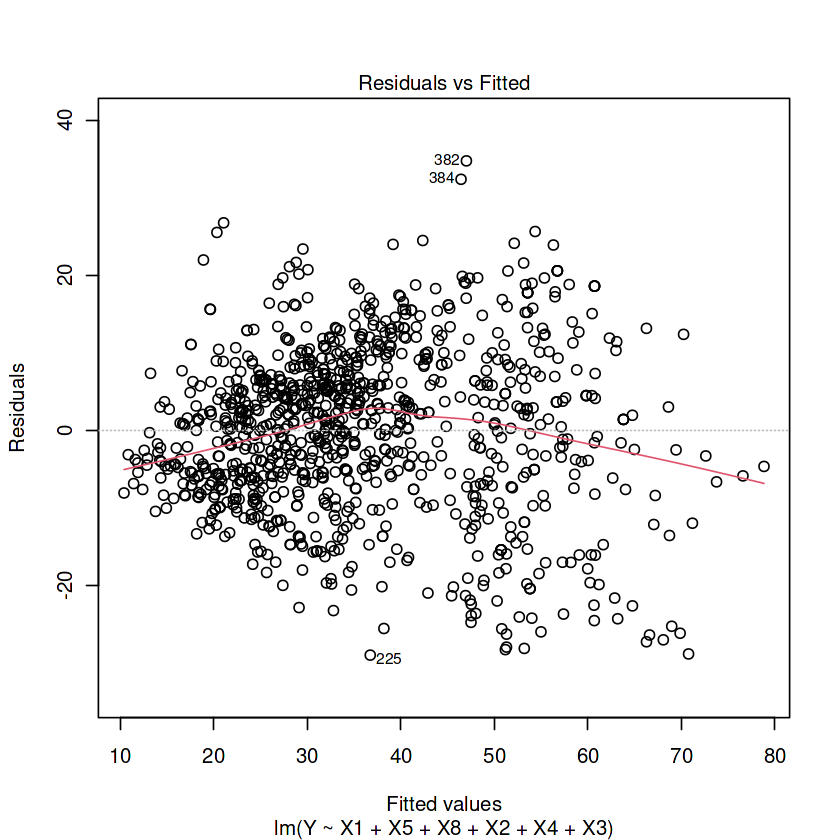

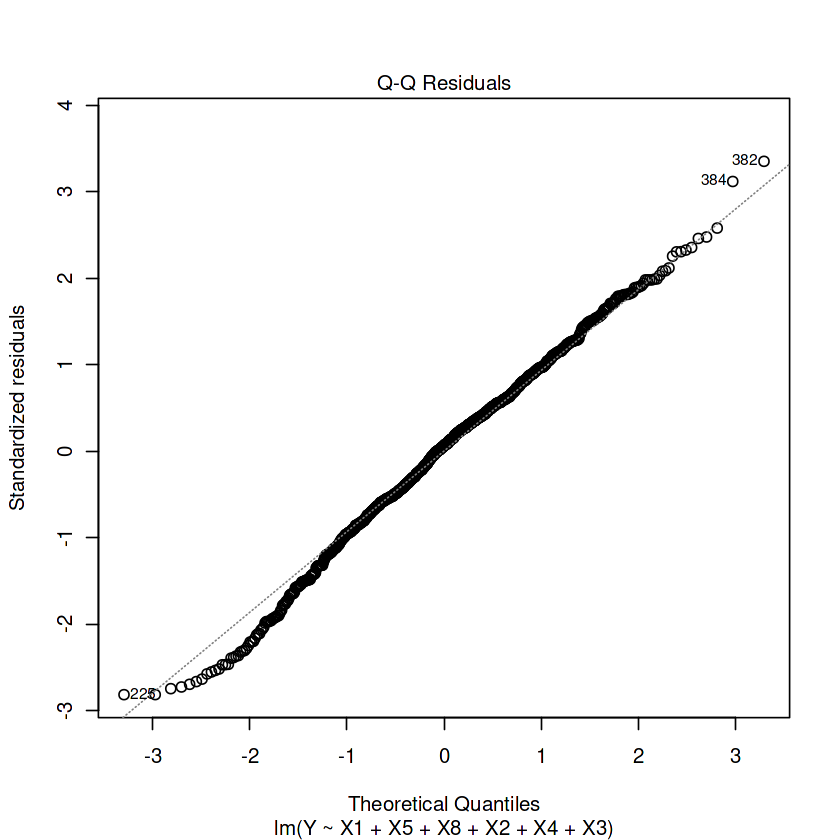

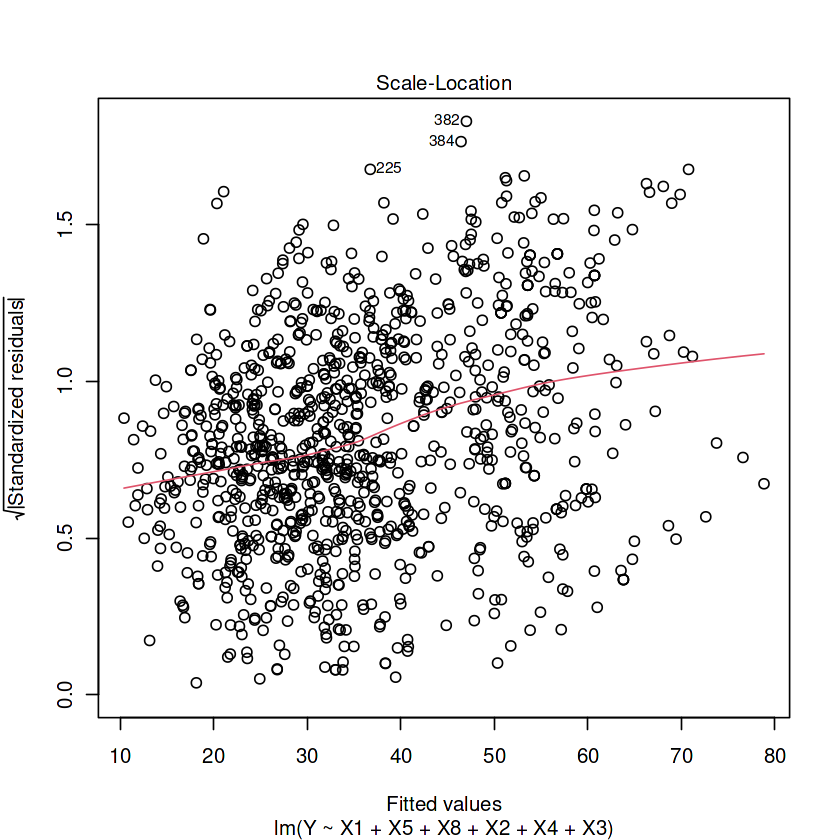

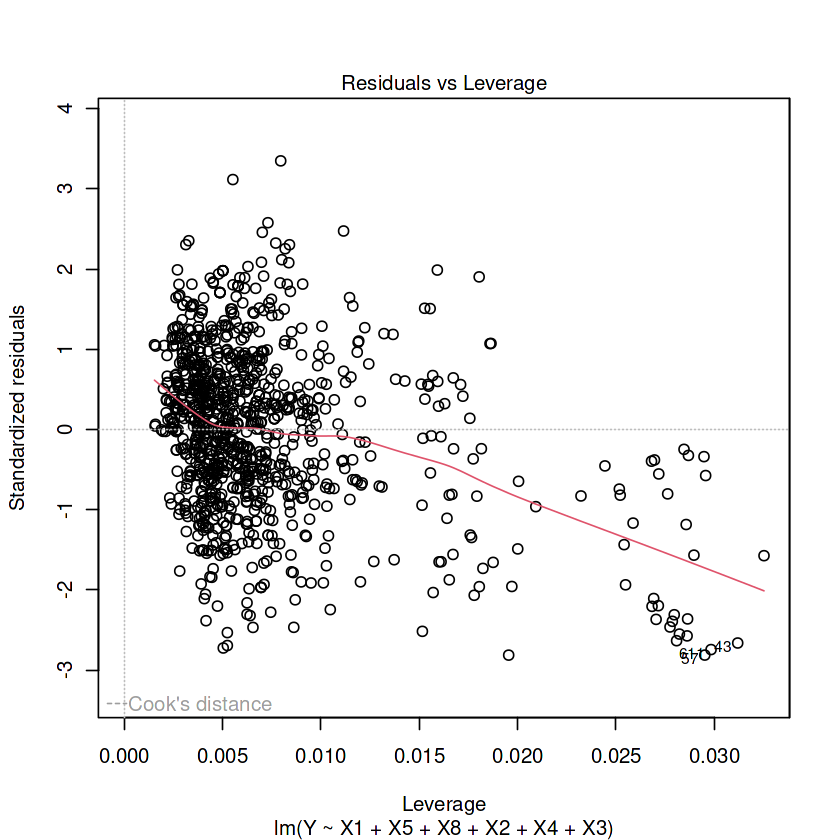

In [9]:
plot(selected)

The residual vs fitted plot indicates it's breaking linearity since it has a fanning effect, not randomly dispersed around 0 line.
Also, error variance is not constant since there is no horizontal band around zero line.

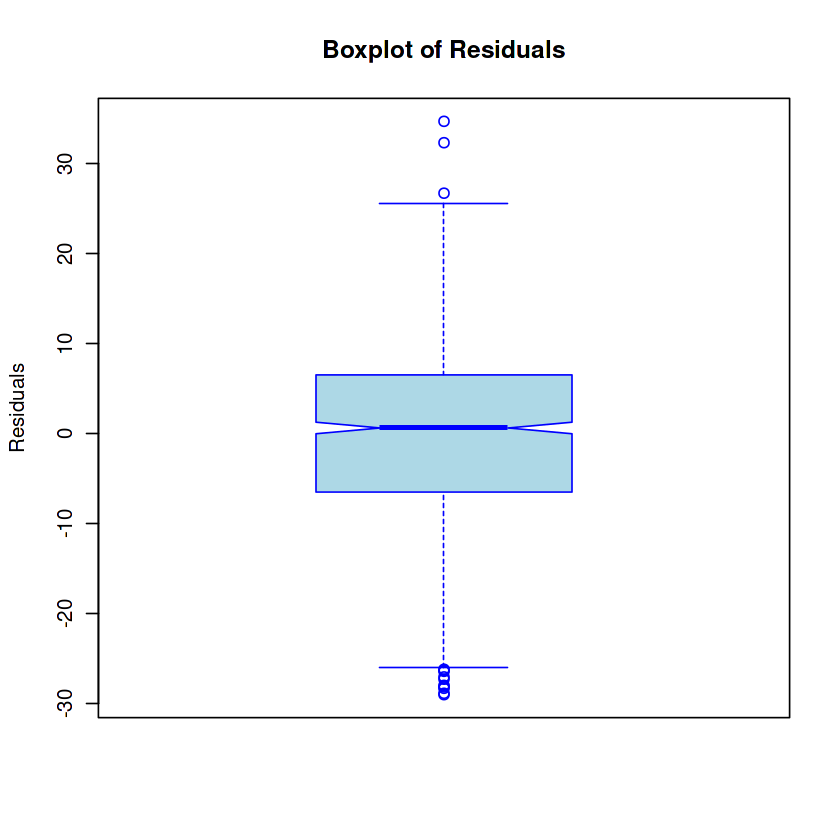

In [8]:
# Assuming your regression model is stored in a variable, e.g., 'model'
# Calculate residuals
residuals <- residuals(selected)

# Create the boxplot of residuals
boxplot(residuals, 
        main = "Boxplot of Residuals", 
        ylab = "Residuals", 
        col = "lightblue", 
        border = "blue", 
        notch = TRUE)


from the boxplot of residuals and the qq normal plot, we can say it's approximately normally distributed. 

now, conducting bp test for constant error variance and shapiro wilk for normality.

In [10]:
shapiro.test(resid(selected))


	Shapiro-Wilk normality test

data:  resid(selected)
W = 0.99584, p-value = 0.006998


In [11]:
library(lmtest)
bptest(selected, studentize=FALSE)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Breusch-Pagan test

data:  selected
BP = 140.55, df = 6, p-value < 2.2e-16


it's failing both, so to fix constant error variance we will transform Y


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




[1] 0.7070707

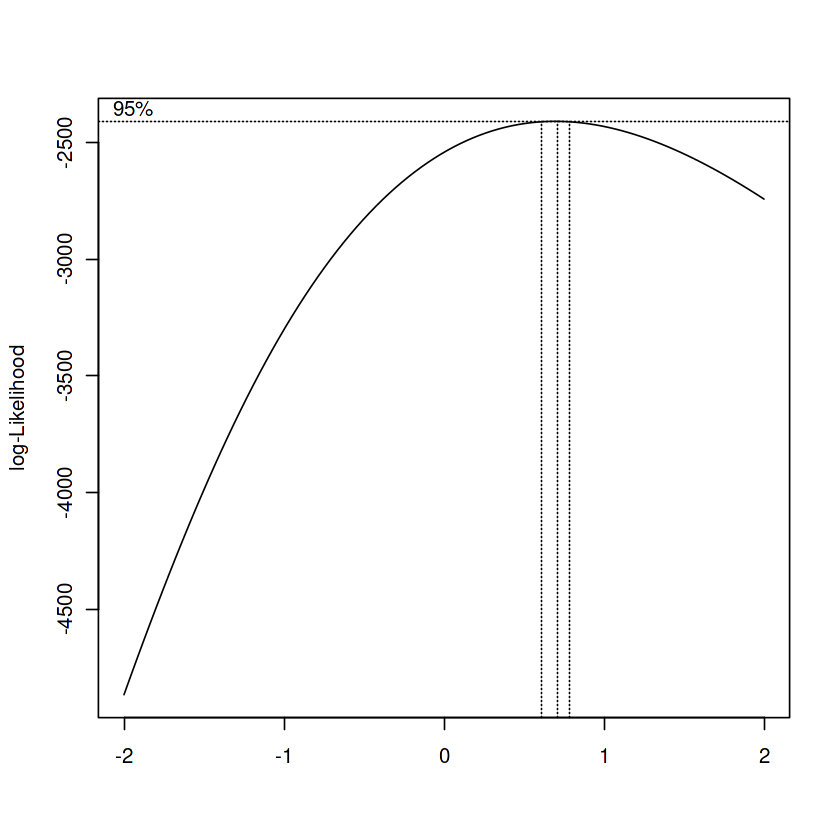

In [13]:
library(MASS)
bc <- boxcox(full_model)
lambda <- bc$x[which.max(bc$y)]
lambda

In [14]:
# Y transformation
trimmed_data$new.Y <- trimmed_data$Y^0.7
head(trimmed_data)

,X1,X2,X3,X4,X5,X8,Y,new.Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,28,79.99,21.48449
2,540.0,0.0,0,162,2.5,28,61.89,17.95289
3,332.5,142.5,0,228,0.0,270,40.27,13.28884
4,332.5,142.5,0,228,0.0,365,41.05,13.46850
5,198.6,132.4,0,192,0.0,360,44.30,14.20635
6,266.0,114.0,0,228,0.0,90,47.03,14.81366


In [15]:
selected_y_transformed <- lm(new.Y ~ X1 + X5 + X8 + X2 + X4 + X3, data = trimmed_data)

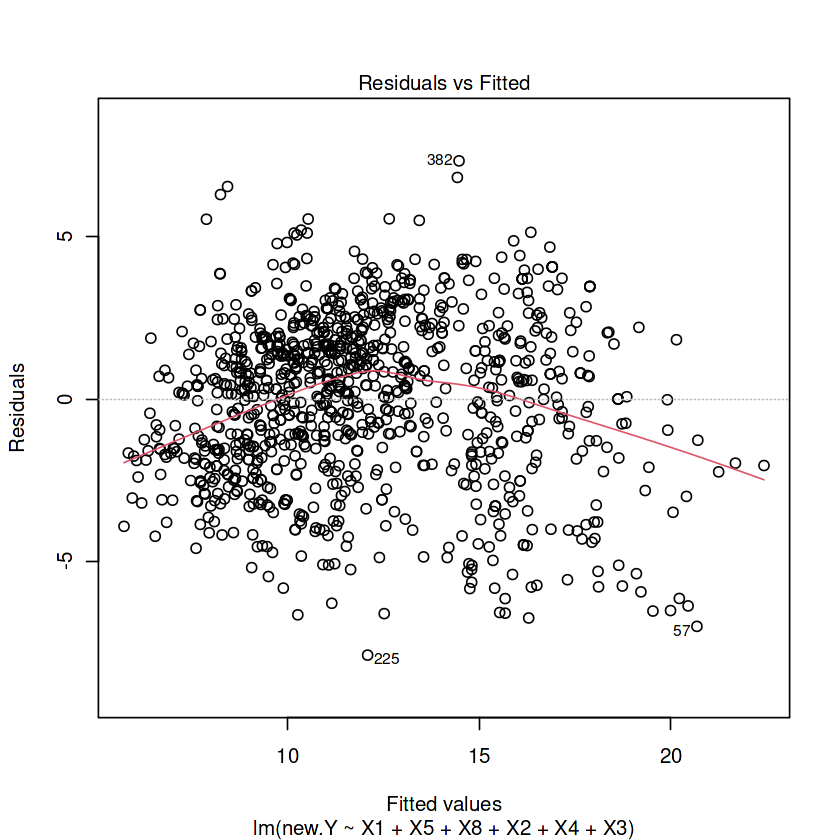

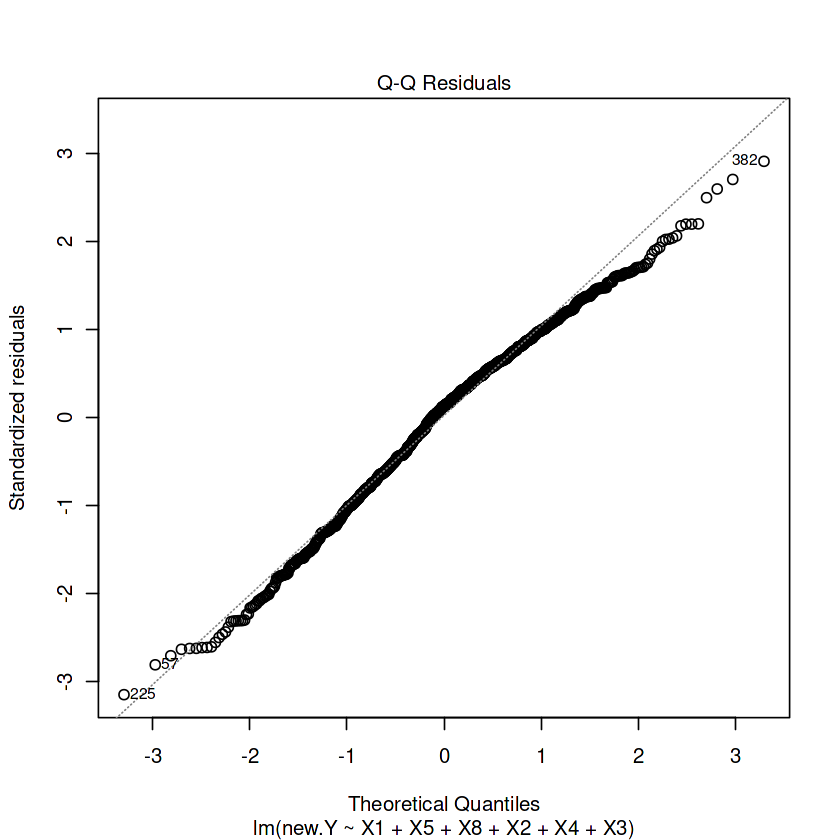

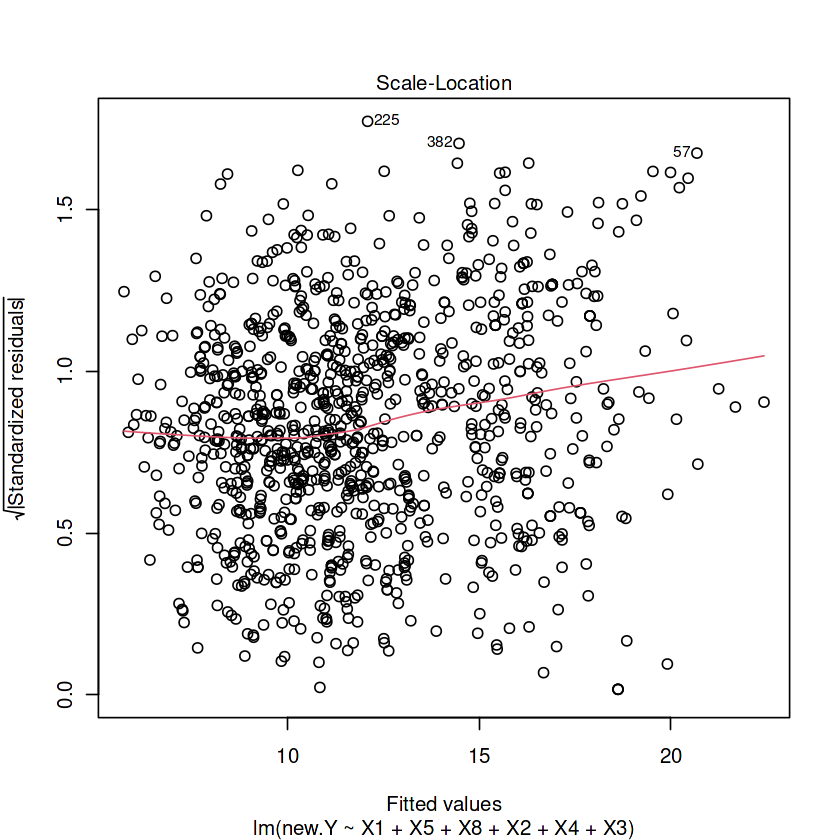

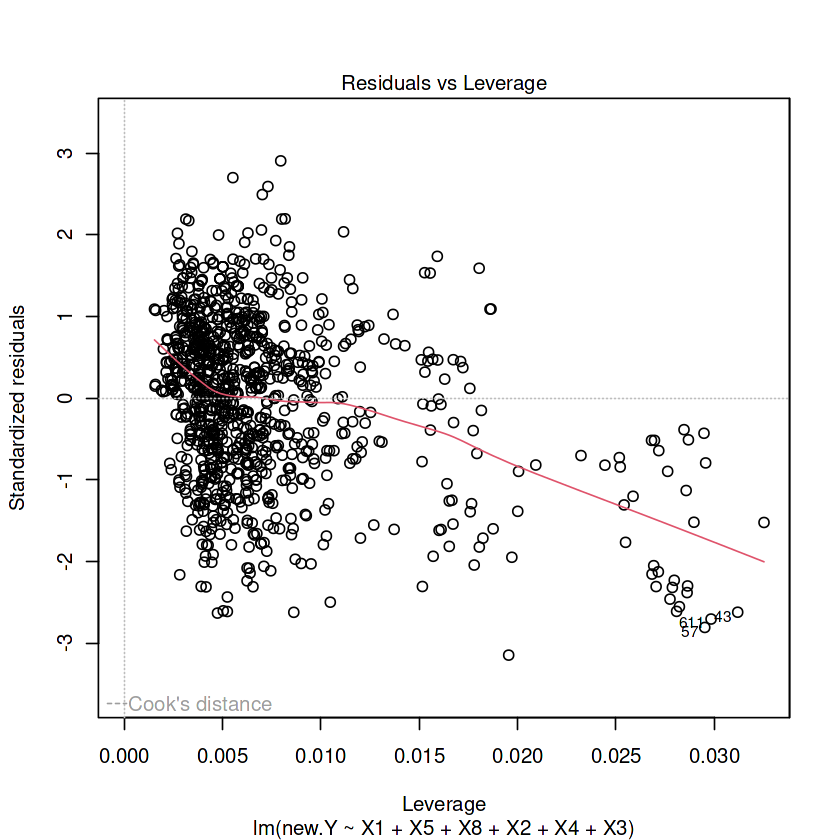

In [16]:
plot(selected_y_transformed)

In [22]:
library(lmtest)
bptest(selected_y_transformed, studentize=FALSE)


	Breusch-Pagan test

data:  selected_y_transformed
BP = 65.063, df = 6, p-value = 4.188e-12


In [18]:
shapiro.test(resid(selected_y_transformed))


	Shapiro-Wilk normality test

data:  resid(selected_y_transformed)
W = 0.9895, p-value = 1.002e-06


still failing both of the tests

In [19]:
install.packages("car")
library(car)
# selected <- lm(Y ~ X1 + X2 + X3 + X4 + X5 + X8, data = trimmed_data)
vif(selected_y_transformed)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘car’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




X1       X5       X8       X2       X4       X3 
1.870198 2.423758 1.108130 1.748922 1.933421 2.327145

now, to fix linearity, we will try to transform X. for that, looking at Y vs predictor plots.

In [32]:
head(trimmed_data)

,X1,X2,X3,X4,X5,X8,Y,new.Y,new.X1,new.X5,new.X8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,28,79.99,21.48449,2.732394,1.581139,1.447158
2,540.0,0.0,0,162,2.5,28,61.89,17.95289,2.732394,1.581139,1.447158
3,332.5,142.5,0,228,0.0,270,40.27,13.28884,2.521792,0.000000,2.431364
4,332.5,142.5,0,228,0.0,365,41.05,13.46850,2.521792,0.000000,2.562293
5,198.6,132.4,0,192,0.0,360,44.30,14.20635,2.297979,0.000000,2.556303
6,266.0,114.0,0,228,0.0,90,47.03,14.81366,2.424882,0.000000,1.954243


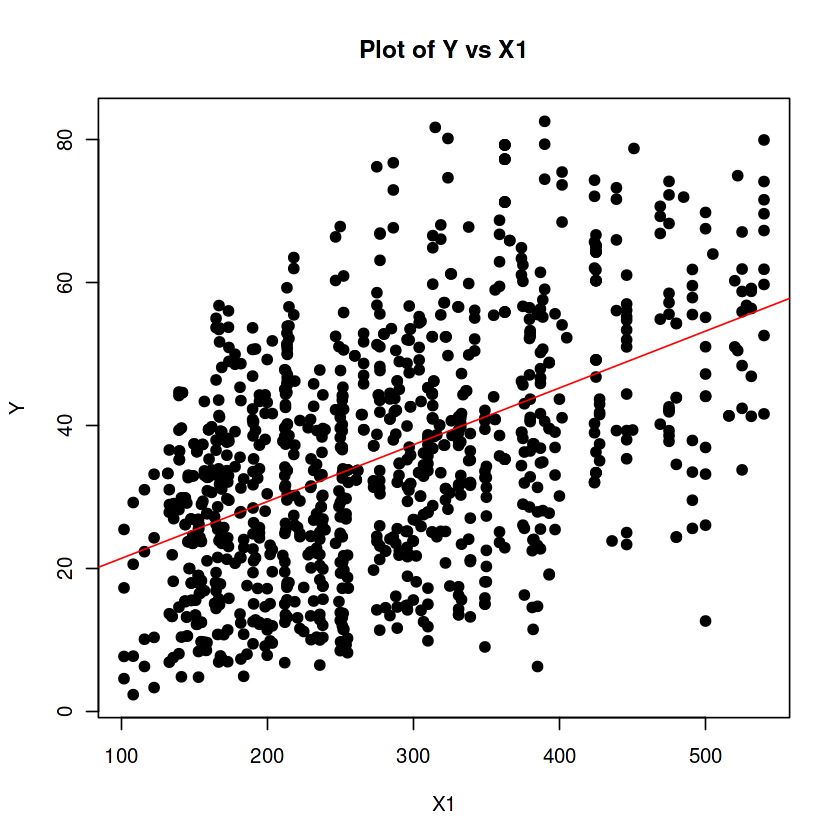

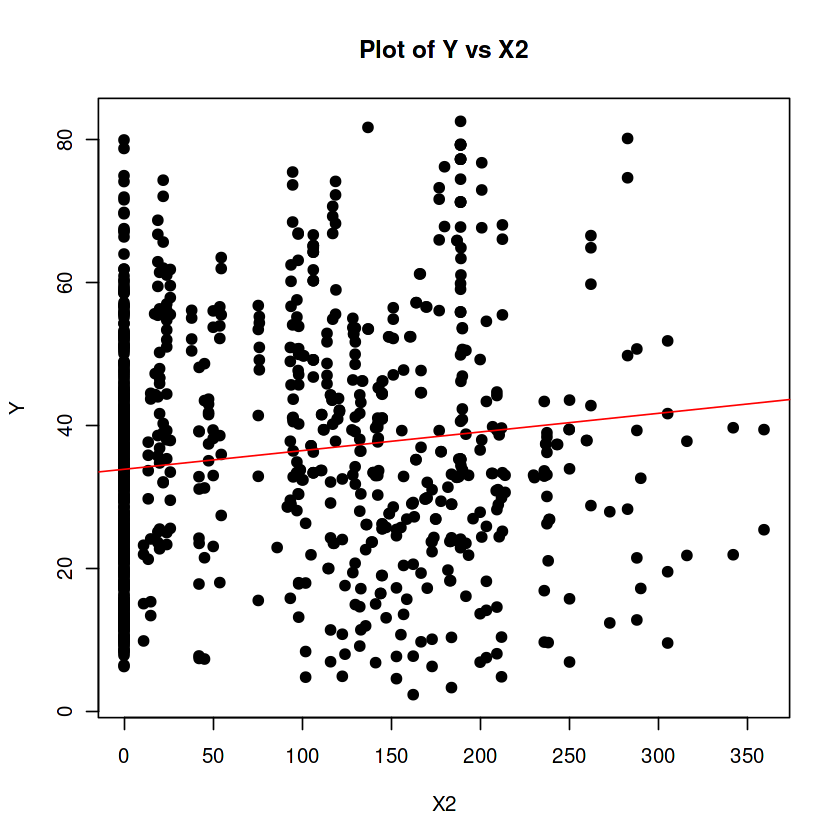

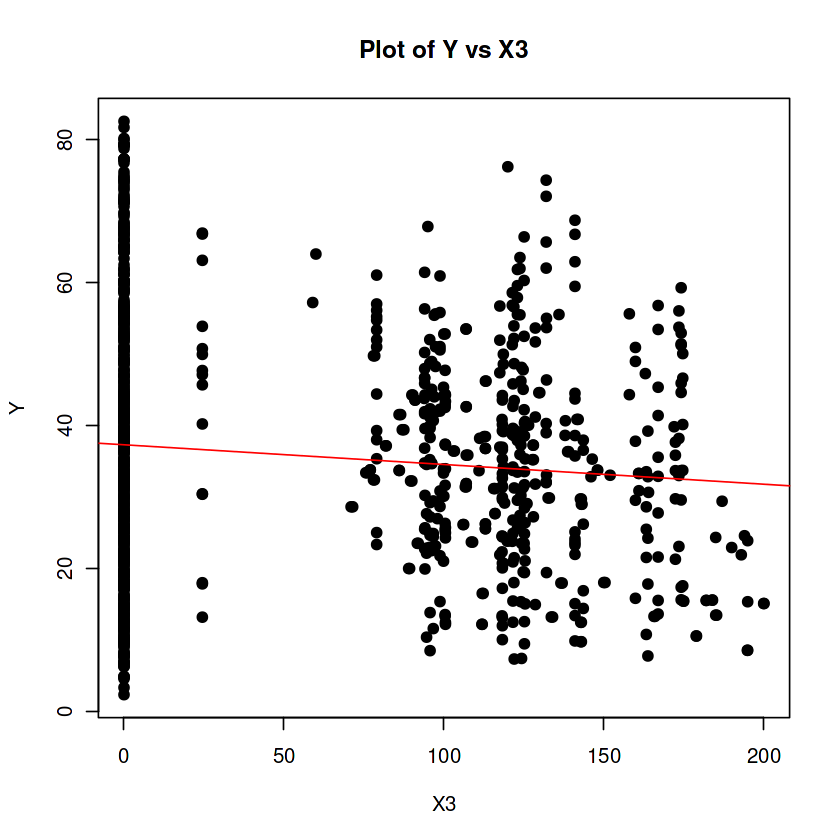

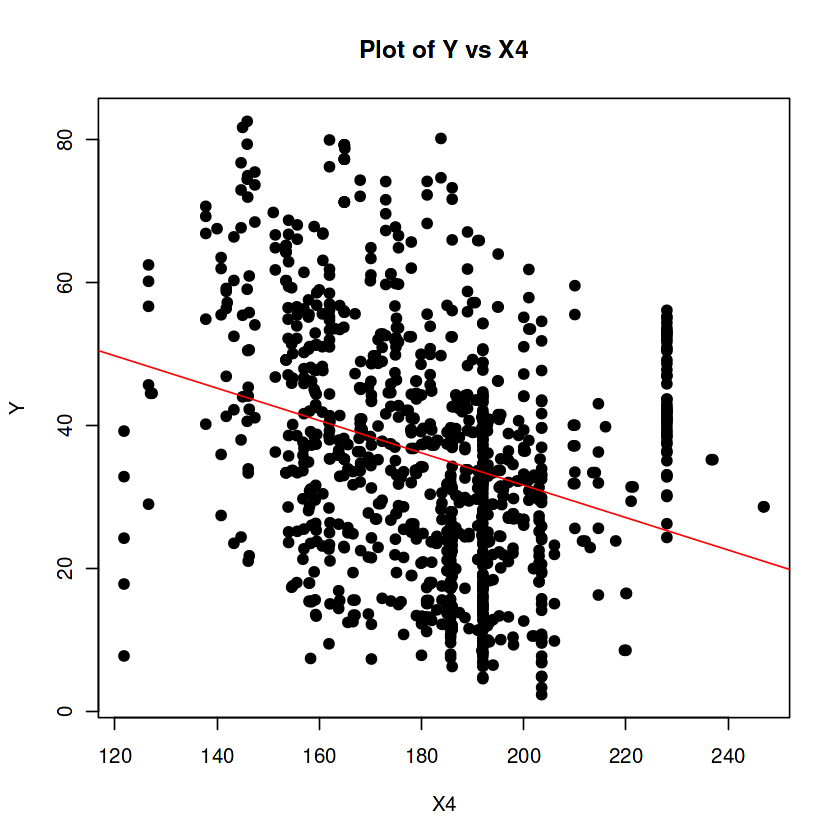

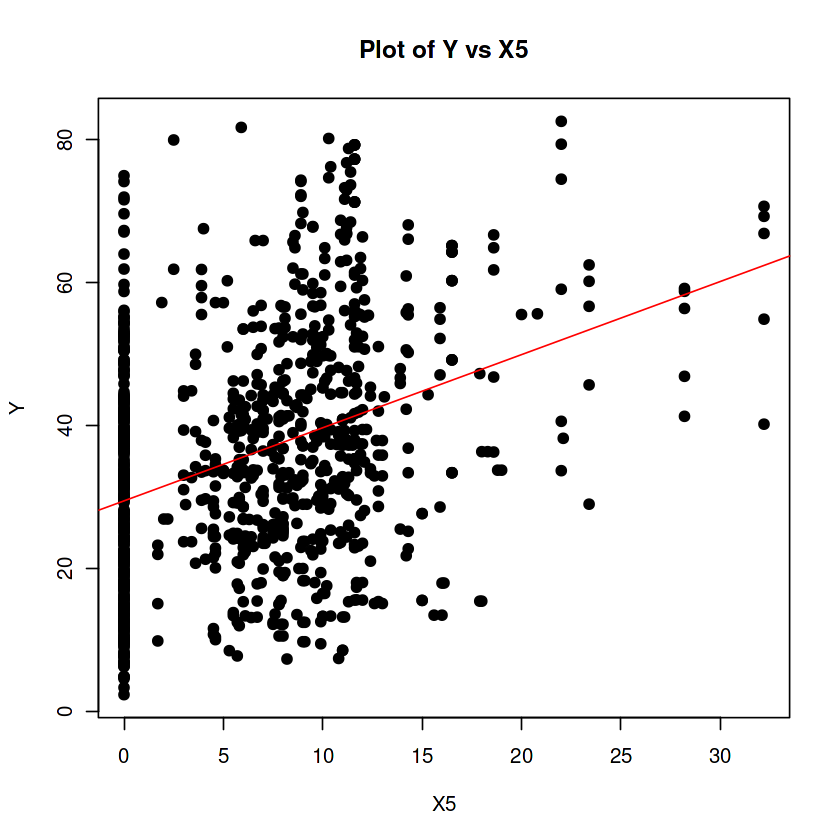

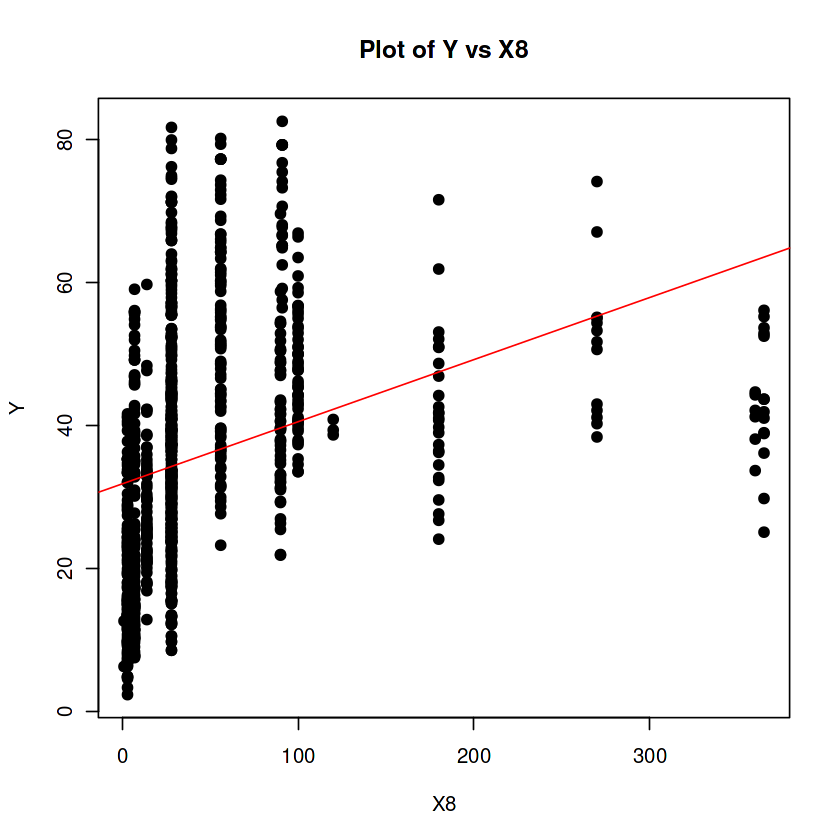

In [44]:
# List of predictors (X1 through X8, excluding X6 and X7)
predictors <- c("X1", "X2", "X3", "X4", "X5", "X8")

# Loop through each predictor and generate the plot
for (predictor in predictors) {
  plot(trimmed_data[[predictor]], trimmed_data$Y, 
       main = paste("Plot of Y vs", predictor), 
       xlab = predictor, 
       ylab = "Y", 
       pch = 19, 
       col = "black")
  
  # Add a regression line
  abline(lm(Y ~ trimmed_data[[predictor]], data = trimmed_data), col = "red")
}


x transformation


In [24]:

trimmed_data$new.X1 <- log10(data$X1)
trimmed_data$new.X5 <- sqrt(data$X5)
trimmed_data$new.X8 <- log10(data$X8)

full_model_t_xy <- lm(new.Y ~ new.X1+X2+X3+X4+new.X5+new.X8, data = trimmed_data)

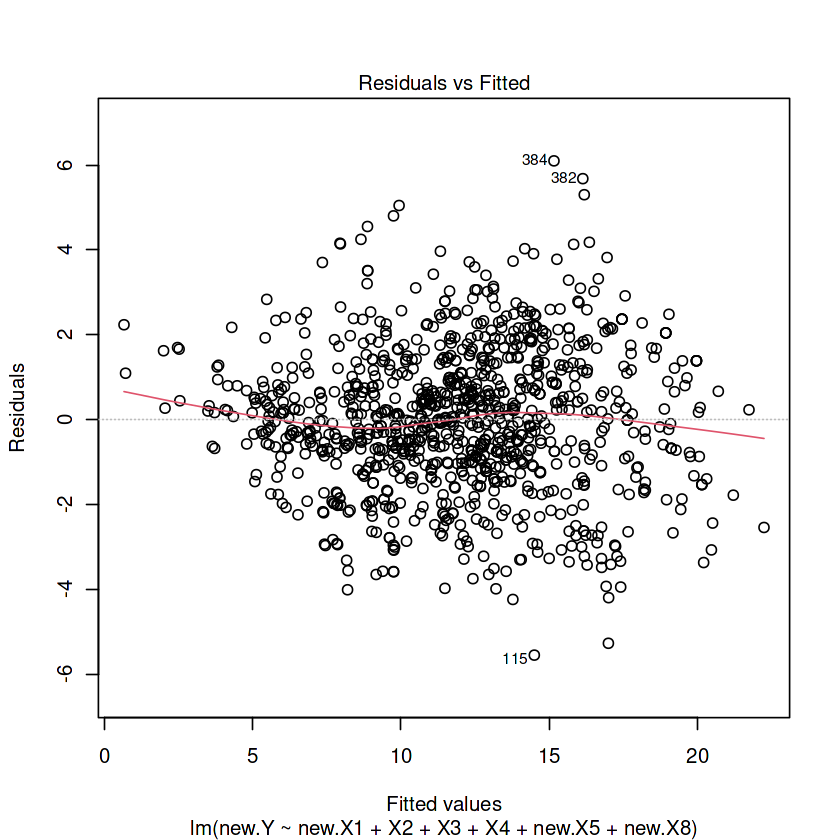

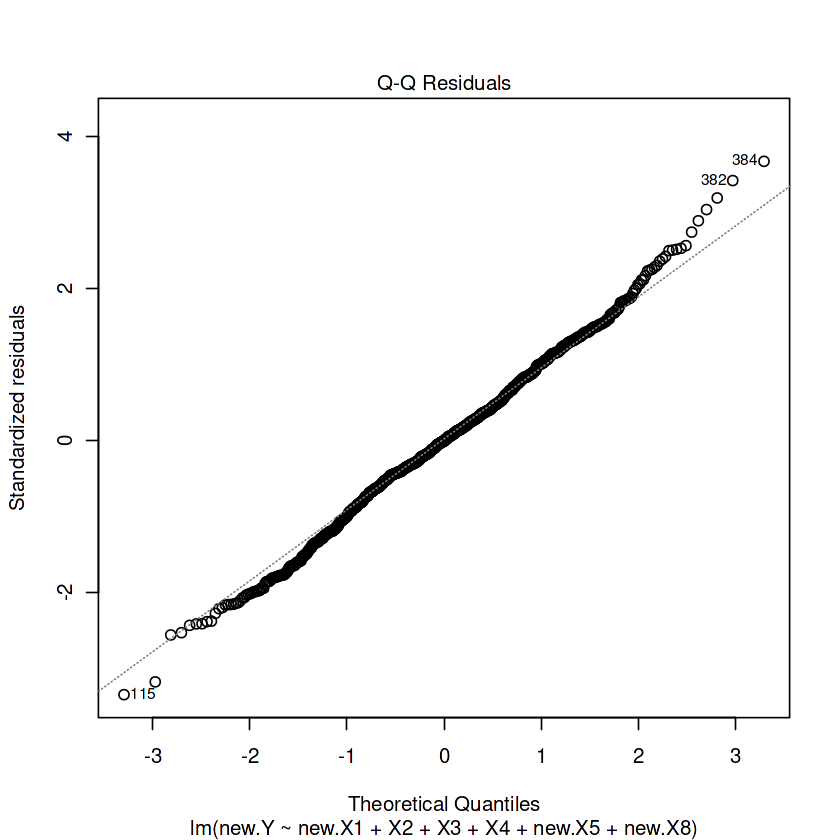

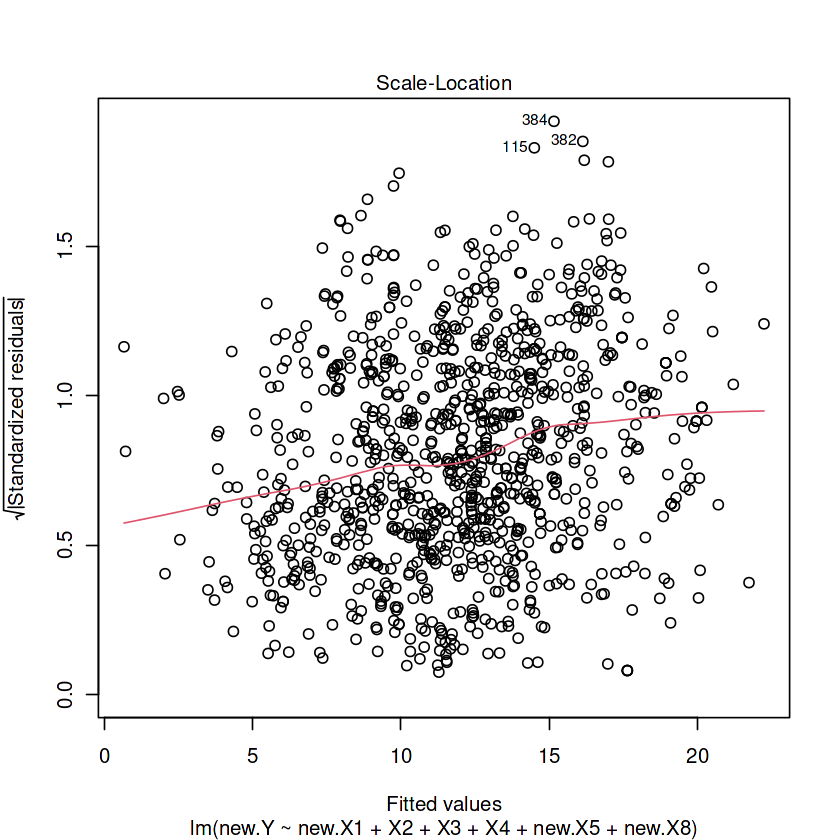

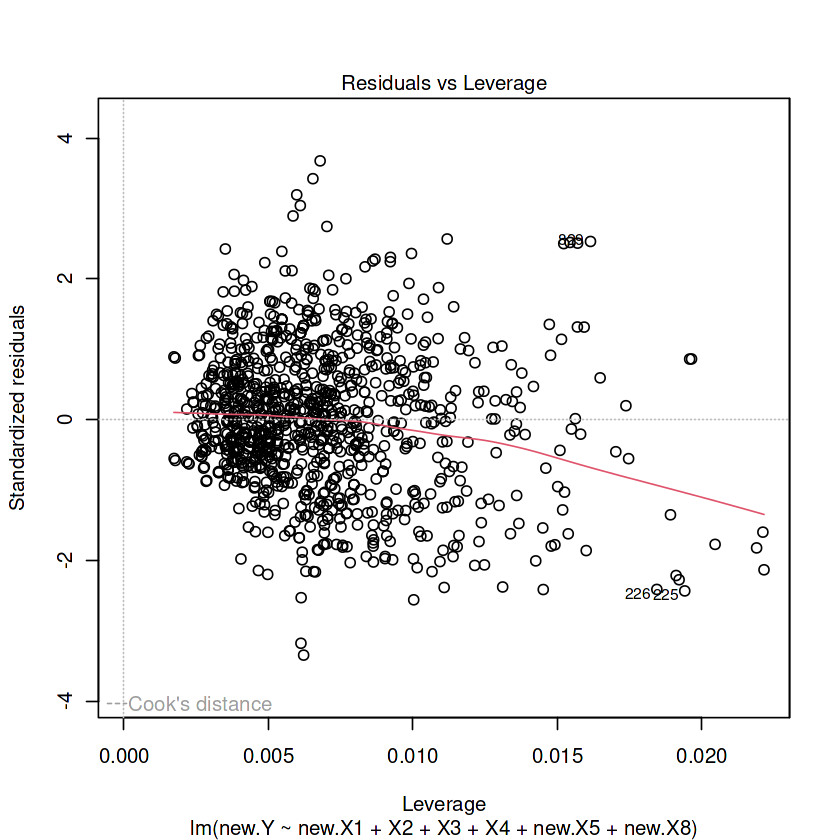

In [31]:
plot(full_model_t_xy)

In [25]:
shapiro.test(resid(full_model_t_xy))


	Shapiro-Wilk normality test

data:  resid(full_model_t_xy)
W = 0.99715, p-value = 0.06407


In [26]:
library(lmtest)
bptest(full_model_t_xy, studentize=FALSE)


	Breusch-Pagan test

data:  full_model_t_xy
BP = 55.086, df = 6, p-value = 4.454e-10


In [27]:
install.packages("car")
library(car)
# selected <- lm(Y ~ X1 + X2 + X3 + X4 + X5 + X8, data = trimmed_data)
vif(full_model_t_xy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘car’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


new.X1       X2       X3       X4   new.X5   new.X8 
1.949116 1.911759 2.996616 1.852604 2.908199 1.039381

trying by standardizing and normalizing predictors.

**Final Model**

evaluating for 
selected_y_transformed <- lm(new.Y ~ X1 + X5 + X8 + X2 + X4 + X3, data = trimmed_data)

In [24]:
train_set$new.Y <- train_set$Y^0.7

train_set$new.X1 <- log10(train_set$X1)
train_set$new.X5 <- sqrt(train_set$X5)
train_set$new.X8 <- log10(train_set$X8)

full_model_t_xy <- lm(new.Y ~ new.X1+X2+X3+X4+new.X5+new.X8, data = train_set)

In [25]:
library(lmtest)
bptest(full_model_t_xy, studentize=FALSE)


	Breusch-Pagan test

data:  full_model_t_xy
BP = 50.724, df = 6, p-value = 3.365e-09


In [26]:
shapiro.test(resid(full_model_t_xy))


	Shapiro-Wilk normality test

data:  resid(full_model_t_xy)
W = 0.99776, p-value = 0.3375


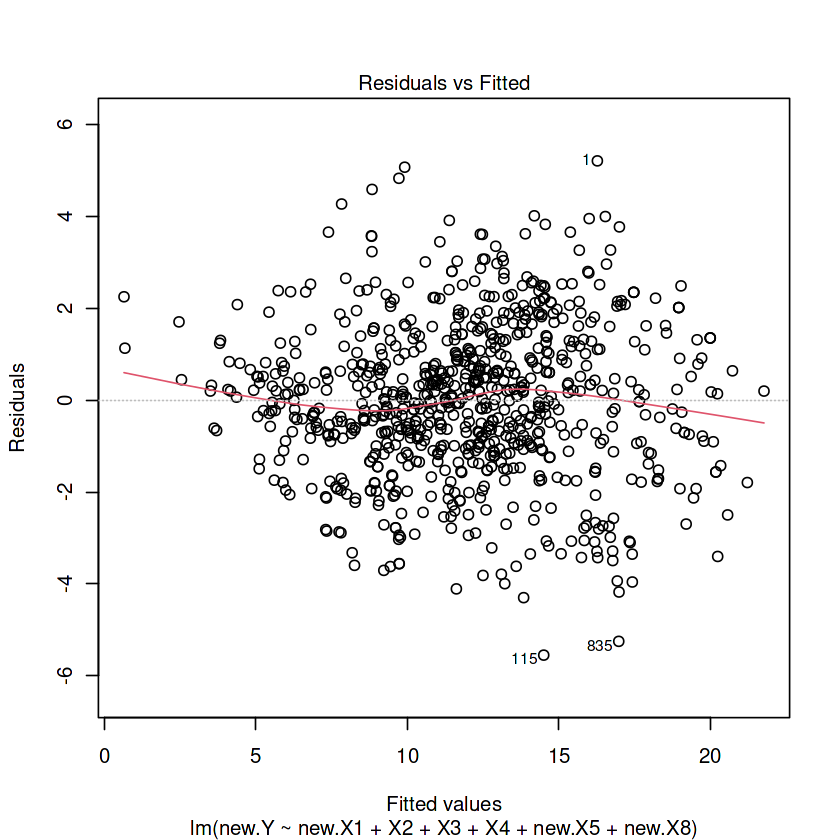

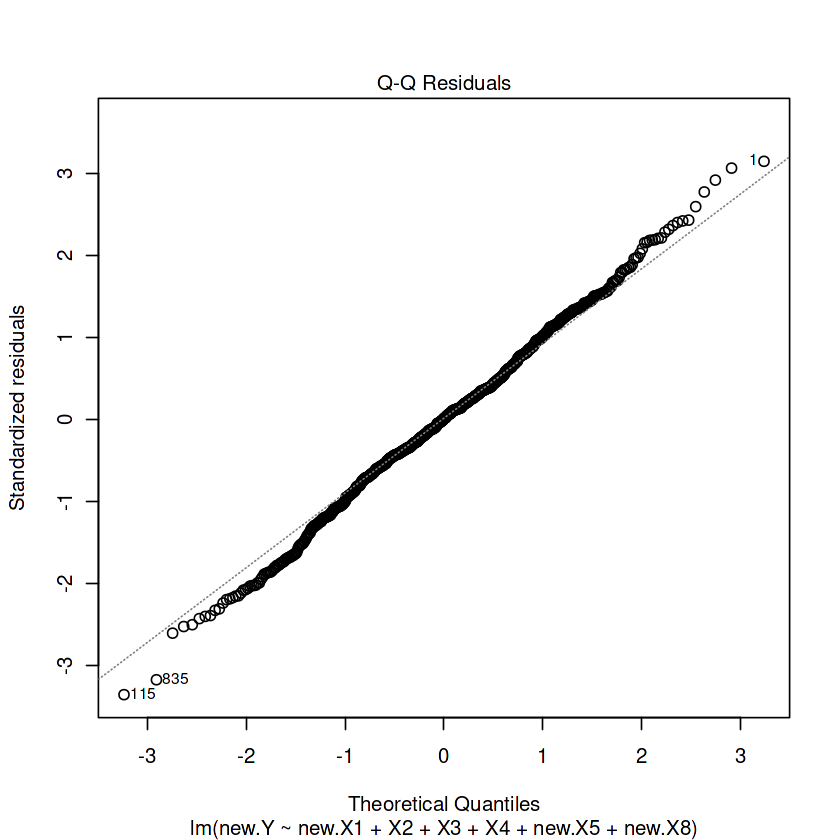

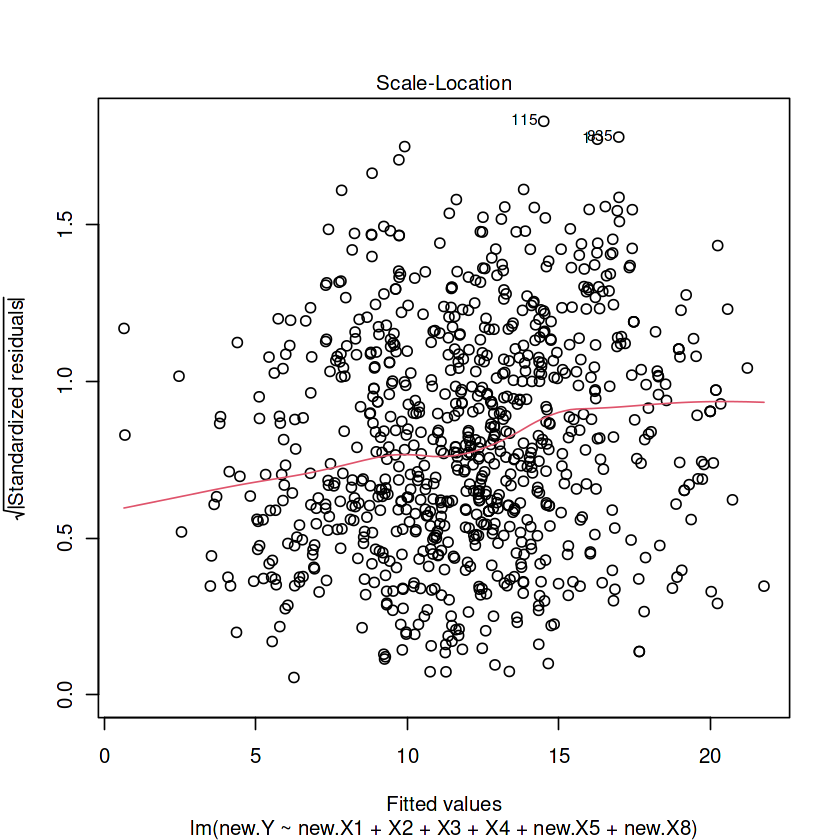

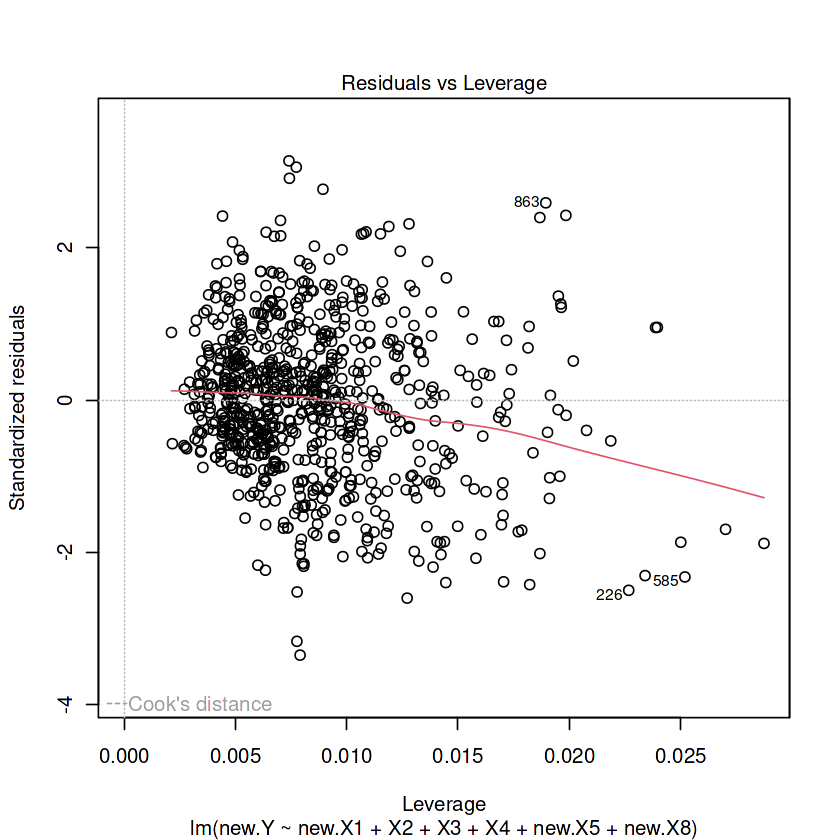

In [27]:
plot(full_model_t_xy)

In [29]:
summary(full_model_t_xy)


Call:
lm(formula = new.Y ~ new.X1 + X2 + X3 + X4 + new.X5 + new.X8, 
    data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5510 -0.9903  0.0182  1.0471  5.2110 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.844e+01  1.406e+00 -20.230  < 2e-16 ***
new.X1       1.671e+01  5.006e-01  33.379  < 2e-16 ***
X2           2.047e-02  9.594e-04  21.341  < 2e-16 ***
X3           1.337e-02  1.585e-03   8.438  < 2e-16 ***
X4          -5.192e-02  3.657e-03 -14.197  < 2e-16 ***
new.X5       2.035e-01  6.295e-02   3.232  0.00128 ** 
new.X8       4.935e+00  1.153e-01  42.815  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.664 on 817 degrees of freedom
Multiple R-squared:  0.8279,	Adjusted R-squared:  0.8266 
F-statistic: 655.1 on 6 and 817 DF,  p-value: < 2.2e-16


In [28]:
test_set$new.Y <- test_set$Y^0.7
test_set$new.X1 <- log10(test_set$X1)
test_set$new.X5 <- sqrt(test_set$X5)
test_set$new.X8 <- log10(test_set$X8)

In [49]:
#test_set$new.Y <- test_set$Y^0.7

# 2. Predict on the test set
predictions <- predict(full_model_t_xy_wo_outliers, newdata = test_set)
# MSE
mse <- mean((test_set$new.Y - predictions)^2)
# RMSE
rmse <- sqrt(mse)
# MAE
mae <- mean(abs(test_set$new.Y - predictions))

# Print the results
cat("MSE:", mse, "\n")
cat("RMSE:", rmse, "\n")
cat("MAE:", mae, "\n")

MSE: 2.815053 
RMSE: 1.677812 
MAE: 1.291949 


In [ ]:
outlier detection

In [31]:
model1 <- full_model_t_xy


anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
new.X1,1,3105.0334,3105.033442,1121.22297,2.006550e-155
X2,1,1020.3152,1020.315158,368.43429,4.592444e-68
X3,1,1028.9009,1028.900887,371.53459,1.575521e-68
X4,1,516.8223,516.822285,186.62376,2.040281e-38
new.X5,1,137.4232,137.423192,49.62331,3.957699e-12
new.X8,1,5076.5776,5076.577624,1833.14466,5.788727e-211
Residuals,817,2262.5404,2.769327,NA,NA


In [33]:
model1 <- full_model_t_xy


anova(model1)

e.i  <- model1$residuals
e.i  <-round(e.i,3)

h.ii <- hatvalues(model1) 
h.ii <-round(h.ii,3)

sse  <- 2262.5404
n    <- nrow(train_set)
p    <- 7
term1 <- n-p-1
term2 <- (sse*(1-h.ii))-(e.i^2)

t.i  <- e.i*sqrt( term1 /term2)
t.i  <- round(t.i,3)

value_table <- cbind(e.i,h.ii,t.i)

#Critical Value ## this is 3.862015 for concrete dataset.
crit_val <- qt(1 - (0.1/(2*n)), df = term1)
#qt(1-(0.1/(2*n)),term1)
print(crit_val)

#|t_i| > critical value
#no outliers w.r.t y

# which |t.i| exceeds the critical value
outlier_idx <- which(abs(t.i) > crit_val)

# print them (if any)
if (length(outlier_idx) == 0) {
  message("No outliers w.r.t y")
} else {
  message("Outliers at rows: ", paste(outlier_idx, collapse = ", "))
  # show their statistics
  print(value_table[outlier_idx, , drop = FALSE])
}

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
new.X1,1,3105.0334,3105.033442,1121.22297,2.006550e-155
X2,1,1020.3152,1020.315158,368.43429,4.592444e-68
X3,1,1028.9009,1028.900887,371.53459,1.575521e-68
X4,1,516.8223,516.822285,186.62376,2.040281e-38
new.X5,1,137.4232,137.423192,49.62331,3.957699e-12
new.X8,1,5076.5776,5076.577624,1833.14466,5.788727e-211
Residuals,817,2262.5404,2.769327,NA,NA


[1] 3.862015


No outliers w.r.t y



In [34]:
# threshold for leverage
lim.h <- 2 * mean(h.ii)

# show the threshold
cat("Leverage cutoff (2*mean(h)): ", round(lim.h, 3), "\n") # Leverage cutoff (2*mean(h)):  0.017 

# find indices where hat-values exceed that
high_lev_idx <- which(h.ii > lim.h)

if (length(high_lev_idx) == 0) {
  message("No high-leverage observations (h_ii > ", round(lim.h,3), ").")
} else {
  message("High-leverage observations at rows: ", paste(high_lev_idx, collapse = ", "))
  # display their h.ii values
  print(data.frame(Index = high_lev_idx,
                   h.ii  = round(h.ii[high_lev_idx], 3)))
}

Leverage cutoff (2*mean(h)):  0.017 


High-leverage observations at rows: 17, 59, 94, 118, 127, 158, 162, 167, 168, 222, 246, 290, 295, 302, 308, 351, 380, 385, 386, 388, 430, 438, 454, 465, 490, 520, 529, 538, 557, 566, 572, 586, 606, 611, 623, 658, 697, 707, 716, 739, 741, 770, 799, 815, 823



    Index  h.ii
407    17 0.020
420    59 0.017
863    94 0.019
654   118 0.017
459   127 0.020
226   158 0.023
167   162 0.017
585   167 0.025
75    168 0.017
829   222 0.020
70    246 0.019
954   290 0.018
500   295 0.017
502   302 0.022
146   308 0.017
933   351 0.021
937   380 0.024
126   385 0.018
667   386 0.017
653   388 0.020
584   430 0.020
757   438 0.017
43    454 0.017
149   465 0.019
678   490 0.017
934   520 0.018
506   529 0.017
828   538 0.020
560   557 0.029
227   566 0.023
924   572 0.018
936   586 0.019
229   606 0.027
100   611 0.017
874   623 0.024
228   658 0.025
747   697 0.017
77    707 0.019
433   716 0.017
503   739 0.019
700   741 0.019
103   770 0.020
891   799 0.018
689   815 0.018
505   823 0.020


In [43]:
nrow(high_lev_idx)

NULL

deleting outliers

In [41]:
# If your original train data is in 'train_set':
train_set_clean <- train_set[-high_lev_idx, ]

# # Or, if you used 'data' directly:
# data_clean <- data[-high_lev_idx, ]

# Verify
nrow(train_set)        # original size
nrow(train_set_clean)  # should be original minus length(high_lev_idx)


[1] 824

[1] 779

In [44]:
full_model_t_xy_wo_outliers <- lm(new.Y ~ new.X1+X2+X3+X4+new.X5+new.X8, data = train_set_clean)

In [47]:
shapiro.test(resid(full_model_t_xy_wo_outliers))


	Shapiro-Wilk normality test

data:  resid(full_model_t_xy_wo_outliers)
W = 0.99747, p-value = 0.2797


In [48]:
library(lmtest)
bptest(full_model_t_xy_wo_outliers, studentize=FALSE)


	Breusch-Pagan test

data:  full_model_t_xy_wo_outliers
BP = 41.902, df = 6, p-value = 1.923e-07


In [45]:
summary(full_model_t_xy_wo_outliers)


Call:
lm(formula = new.Y ~ new.X1 + X2 + X3 + X4 + new.X5 + new.X8, 
    data = train_set_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6992 -0.9577  0.0279  0.9759  5.2165 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28.764213   1.492567 -19.272   <2e-16 ***
new.X1       17.148999   0.524146  32.718   <2e-16 ***
X2            0.022004   0.001014  21.706   <2e-16 ***
X3            0.015242   0.001720   8.861   <2e-16 ***
X4           -0.056665   0.004143 -13.676   <2e-16 ***
new.X5        0.147660   0.070273   2.101   0.0359 *  
new.X8        4.976264   0.116786  42.610   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.612 on 772 degrees of freedom
Multiple R-squared:  0.8343,	Adjusted R-squared:  0.833 
F-statistic:   648 on 6 and 772 DF,  p-value: < 2.2e-16
